# Mouse islets - diabetic STZ model

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc
import pandas as pd
import seaborn as sns
import xlsxwriter
from matplotlib import rcParams
import gseapy as gp
sc.settings.verbosity = 3
sc.logging.print_header()

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


scanpy==1.6.0 anndata==0.7.5 umap==0.4.5 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.1 statsmodels==0.10.1 python-igraph==0.8.0 louvain==0.7.0 leidenalg==0.7.0


In [2]:
sc.set_figure_params(frameon=False)

## Load data and preprocess data

Data was downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128565

In [3]:
adata = sc.read('/data/GSE128565_adata_processed.h5ad.h5')

In [4]:
adata_raw = sc.read('/data/GSE128565_adata_raw.h5ad.h5')

In [7]:
adata_raw = adata_raw[adata.obs_names].copy()

In [9]:
adata_raw.obs = adata.obs

In [10]:
sc.pp.normalize_total(adata_raw, exclude_highly_expressed=True)
sc.pp.log1p(adata_raw)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Gcg', 'Chgb', 'Spata21', 'Try5', 'Ghrl', 'Iapp', 'Hbb-bs', 'Zg16', 'Ins2', 'Hba-a1', 'Hba-a2', 'Ppy', 'Pyy', 'Chga', 'Sst', 'Tff3', 'Ttr', 'Malat1', 'Ins1', 'mt-Nd1', 'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Cytb']
    finished (0:00:01)


In [1007]:
mouse = adata_raw[adata_raw.obs.treatment.isin(['Ctrl', 'Vehicle-STZ'])].copy()

In [1008]:
mouse.obs.treatment.cat.rename_categories({'Vehicle-STZ': 'diabetic-STZ'}, inplace=True)

In [959]:
mouse = adata_raw[adata_raw.obs.groups_named_broad.isin(['beta', 'alpha', 'delta', 'PP'])].copy()

In [960]:
for i in ['groups_named_broad_colors', 'groups_named_fine_colors', 'groups_named_beta_dpt_colors', 'proliferation_man_colors']:
    mouse.uns[i] = adata.uns[i]

In [1011]:
mouse.var_names = mouse.var_names.str.upper()

In [1012]:
mouse.var_names_make_unique()

## Selected marker gene expression

In [1030]:
genes = ['PTGER3', 'PTGER4', 'SCN3B', 'CACNA2D2', 'CACNA1H']

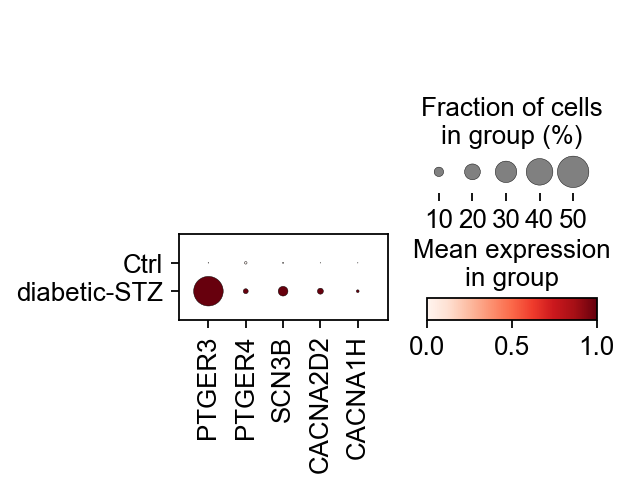

In [1031]:
sc.pl.dotplot(mouse[mouse.obs.groups_named_broad=='beta'].copy(), groupby='treatment', 
              var_names=genes, 
              dot_max=0.5, standard_scale='var')